In [36]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,  classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
# from imblearn.over_sampling import SMOTE
import warnings 
warnings.filterwarnings("ignore")



# Case study..
Equity bank was hit by 2.1 million USD debit card fraud.

Here the "card not present" scam was used to steal from the victims. This uses stolen card details to shop online, the fraudsters often create websites for accessing the funds in those cards.

These transactions are done in batches since most of the banks requires customers to disclose their information.

Kenyan Banks lose about USD 130 million to cyber criminals yearly mostly through;
loan stacking ... practice of getting approval for multiple loans or credits simultaneously within a very short period
Identity theft 

# Here are the Objectives..
1. Classify whether a transactions is fraudulent or non-fraudulent using patterns from historical data

2. Identify unusual transactions patterns that may signal fraudulent activities, checking for outliers within the transactions.

3. Train machine learning model which predicts fraudulent transactions based on historical data.

4. Study how demographics including age and gender impact fraud risks.

5. Identify peak fraud periods based on transactions date and transactions time.

# References 
https://techcabal.com/2024/04/24/equity-bank-employee-involved-in-fraud/

In [2]:
df = pd.read_csv("data/Bank_Transaction_Fraud_Detection.csv")
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


In [3]:
# checking for missing value
df.isna().sum()

Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64

In [4]:
# check the shape of the dataset
print("Shape of the dataset:", df.shape)


Shape of the dataset: (200000, 24)


In [5]:
# Here check for the column name and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

In [6]:
# check for the summary statistics for the numerical columns
print(df.describe())

                 Age  Transaction_Amount  Account_Balance       Is_Fraud
count  200000.000000       200000.000000    200000.000000  200000.000000
mean       44.015110        49538.015554     52437.988784       0.050440
std        15.288774        28551.874004     27399.507128       0.218852
min        18.000000           10.290000      5000.820000       0.000000
25%        31.000000        24851.345000     28742.395000       0.000000
50%        44.000000        49502.440000     52372.555000       0.000000
75%        57.000000        74314.625000     76147.670000       0.000000
max        70.000000        98999.980000     99999.950000       1.000000


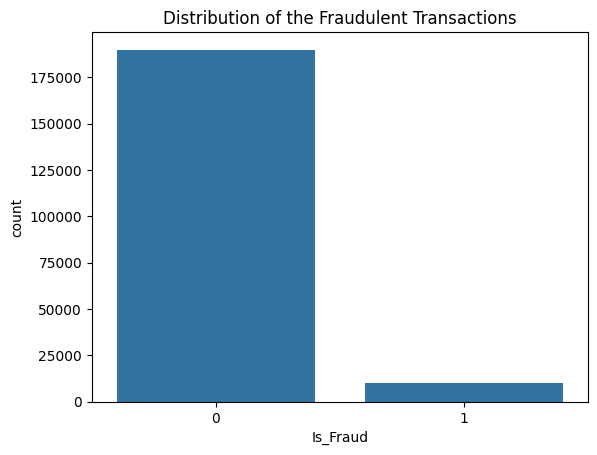

In [7]:
# Analyzing the target variable by checking distribution 
df["Is_Fraud"].value_counts(normalize = True)

# visualizing the distribution
sns.countplot(x = "Is_Fraud", data = df)
plt.title("Distribution of the Fraudulent Transactions")
plt.show()

In [8]:
df["Is_Fraud"].value_counts(normalize = True)

Is_Fraud
0    0.94956
1    0.05044
Name: proportion, dtype: float64

For the class 0 indicating (Non-fraud cases) which is 94.956% of the data while for class 1 (fraud cases) 5.044% of the data. This clearly shows s significant class imbalance, where the non-fraud cases vastly outnumbers the fraud cases.

In [9]:
# Analysis on how gender affects the fraud cases reported
df["Gender"].value_counts(normalize = True)

Gender
Male      0.50226
Female    0.49774
Name: proportion, dtype: float64

Which gender has been affected by Fraud cases.

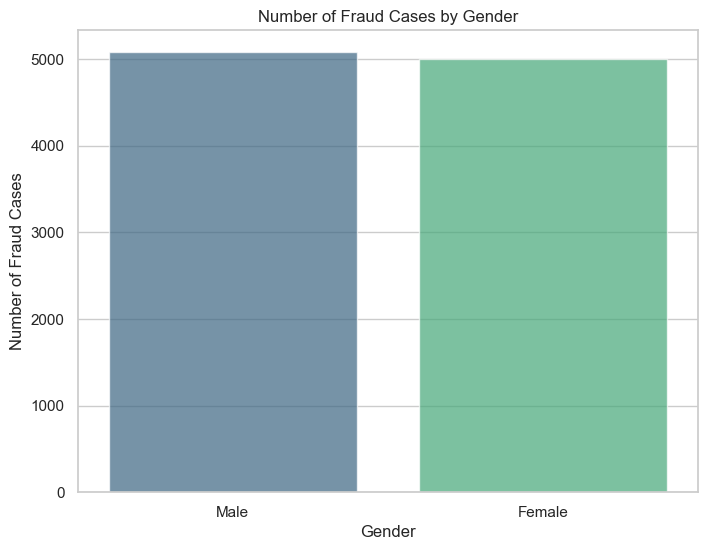

In [10]:
# Grouping the data by gender to get the number of fraud cases for each gender
gender_fraud = df[df["Is_Fraud"] == 1]['Gender'].value_counts()

# Creating a bar plot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_fraud.index, y=gender_fraud.values, palette="viridis", alpha=0.7)
plt.title('Number of Fraud Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Fraud Cases')
plt.show()

 The male gender has a significantly higher number of fraud cases compared to the female which further suggest that the male gender are more targeted to fraud.

# Checking the distribution for the transaction amounts based on the fraud cases

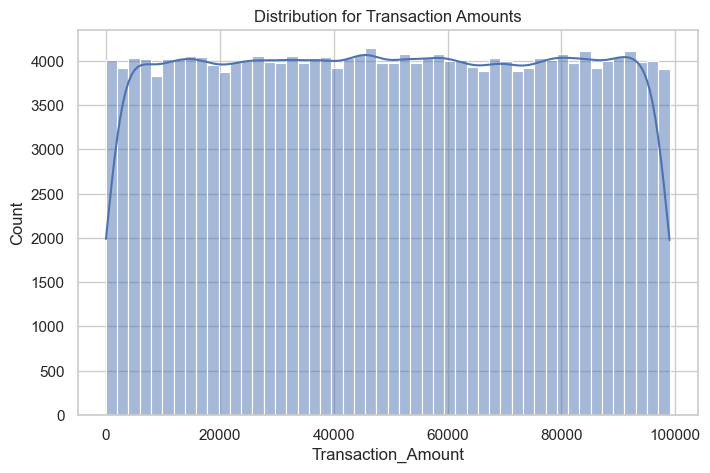

In [11]:
# Distribution of the transaction amounts
plt.figure(figsize = (8, 5))
sns.histplot(df["Transaction_Amount"], bins = 50, kde = True)
plt.title("Distribution for Transaction Amounts")
plt.show()

In [ ]:
# Grouping the data to get the total transaction amount affected by fraud
fraud_transactions = df[df["Is_Fraud"] == 1]['Transaction_Amount'].sum()
non_fraud_transactions = df[df["Is_Fraud"] == 0]['Transaction_Amount'].sum()

# Creating a dictionary for visualization
data = {
    'Fraud Status': ['Fraud', 'Non-Fraud'],
    'Total Transaction Amount': [fraud_transactions, non_fraud_transactions]
}

# Creating a bar plot using Plotly
fig = px.bar(data, x='Fraud Status', y='Total Transaction Amount',
             title='Total Transaction Amount Affected by Fraud',
             labels={'Fraud Status': 'Fraud Status', 'Total Transaction Amount': 'Total Transaction Amount'},
             color='Fraud Status')

# Display the plot
fig.show()

# Analyzing the transaction type based on the Fraud cases

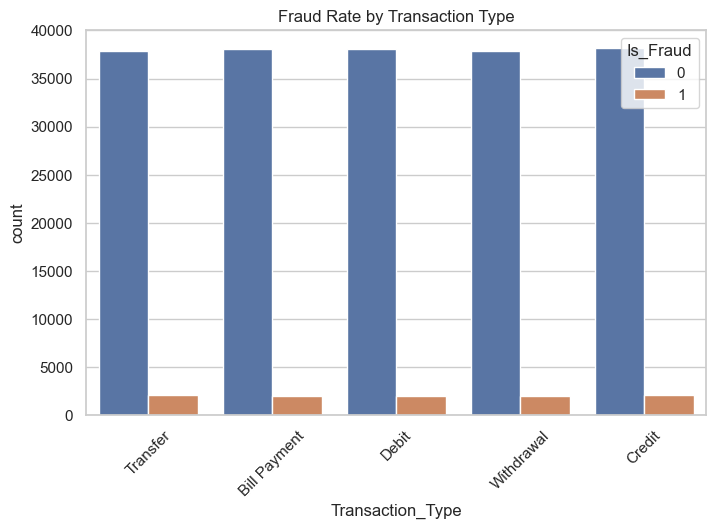

In [15]:
# Analyze the transaction type based on Fraud cases.
plt.figure(figsize = (8, 5))
sns.countplot(x = df["Transaction_Type"], hue = df["Is_Fraud"])
plt.xticks(rotation = 45)
plt.title("Fraud Rate by Transaction Type")
plt.show()

# Data Preparation

In [18]:
selected_columns = df.drop(columns = ['Customer_ID', 'Customer_Name', 'State', 'City', 'Bank_Branch', 'Transaction_ID', 'Merchant_ID', 
                                 'Transaction_Location', 'Transaction_Currency', 'Customer_Contact', 'Customer_Email'])

# create a copy of the data frame for the selected columns
df1 = selected_columns.copy()
df1.head()

,Gender,Age,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Device_Type,Is_Fraud,Transaction_Description
0,Male,60,Savings,23-01-2025,16:04:07,32415.45,Transfer,Restaurant,74557.27,Voice Assistant,POS,0,Bitcoin transaction
1,Female,51,Business,11-01-2025,17:14:53,43622.60,Bill Payment,Restaurant,74622.66,POS Mobile Device,Desktop,0,Grocery delivery
2,Male,20,Savings,25-01-2025,03:09:52,63062.56,Bill Payment,Groceries,66817.99,ATM,Desktop,0,Mutual fund investment
3,Female,57,Business,19-01-2025,12:27:02,14000.72,Debit,Entertainment,58177.08,POS Mobile App,Mobile,0,Food delivery
4,Female,43,Savings,30-01-2025,18:30:46,18335.16,Transfer,Entertainment,16108.56,Virtual Card,Mobile,0,Debt repayment


Gender
Female    5007
Male      5081
dtype: int64


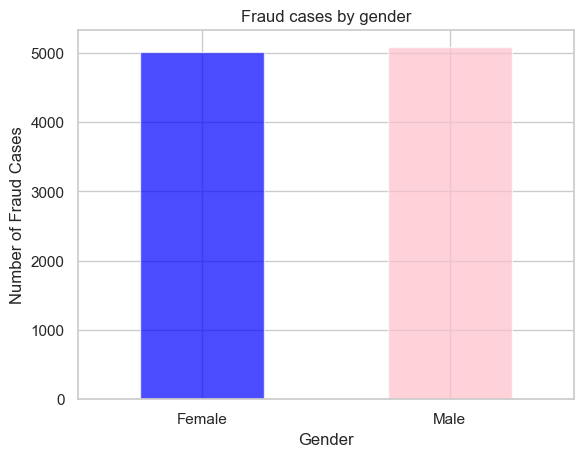

In [19]:
# Visualize which gender has been affected by fraud cases
# here lets group by gender to and count the number of fraud cases
fraud_gender = df1[df1['Is_Fraud'] == 1].groupby("Gender").size()
print(fraud_gender)

# plot the count of fraud cases by gender
fraud_gender.plot(kind = 'bar', color = ['blue', 'pink'], alpha = .7)
plt.title('Fraud cases by gender')
plt.xlabel('Gender')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation = 0)
plt.show()


The fraud cases are almost equally distributed between males and females, however for the males they seem to constitute slightly higher percentage

From the analysis there seem to be a minor difference in the number of fraud cases between genders suggesting that the fraud occurences is relatively balanced across the genders.


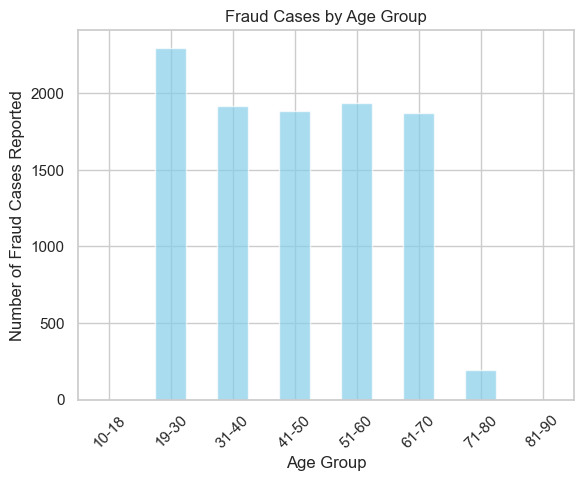

In [20]:
# Classify the age into bins for the ages affected by fraud.
bins = [10, 18, 30, 40, 50, 60, 70, 80, 90]
labels = ['10-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
df1['age_group'] = pd.cut(df1['Age'], bins = bins, labels = labels, right = False)

# filter the DataFrame for fraud cases and group 
age_bins_fraud = df1[df1["Is_Fraud"] == True]['age_group'].value_counts().sort_index()

# plot the ages for each bin showing the fraud cases
age_bins_fraud.plot(kind = 'bar', color = 'skyblue', alpha = .7)
plt.title('Fraud Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Fraud Cases Reported')
plt.xticks(rotation=45)
plt.show()

For customers at the age 19-30 and 51 - 60 show significantly higher numbers of fraud cases which further indicates that individuals in the age gropus are more vulnerable to fraud.

In [22]:
df1["Account_Type"].value_counts()

Account_Type
Checking    66924
Savings     66593
Business    66483
Name: count, dtype: int64

/nHere is the grouped data by Transaction Device and Fraud Status:
Is_Fraud                          0     1
Transaction_Device                       
ATM                           20167  1033
ATM Booth Kiosk               20067  1082
Bank Branch                    7480   375
Banking Chatbot                7617   378
Biometric Scanner              7523   429
Debit/Credit Card              7818   455
Desktop/Laptop                 7646   411
Mobile Device                  7482   397
POS Mobile App                 7477   391
POS Mobile Device              7600   406
POS Terminal                   7483   365
Payment Gateway Device         7452   422
QR Code Scanner                7527   411
Self-service Banking Machine  20650  1057
Smart Card                     7722   411
Tablet                         7652   407
Virtual Card                   7620   439
Voice Assistant                7627   412
Wearable Device                7729   399
Web Browser                    7573   408


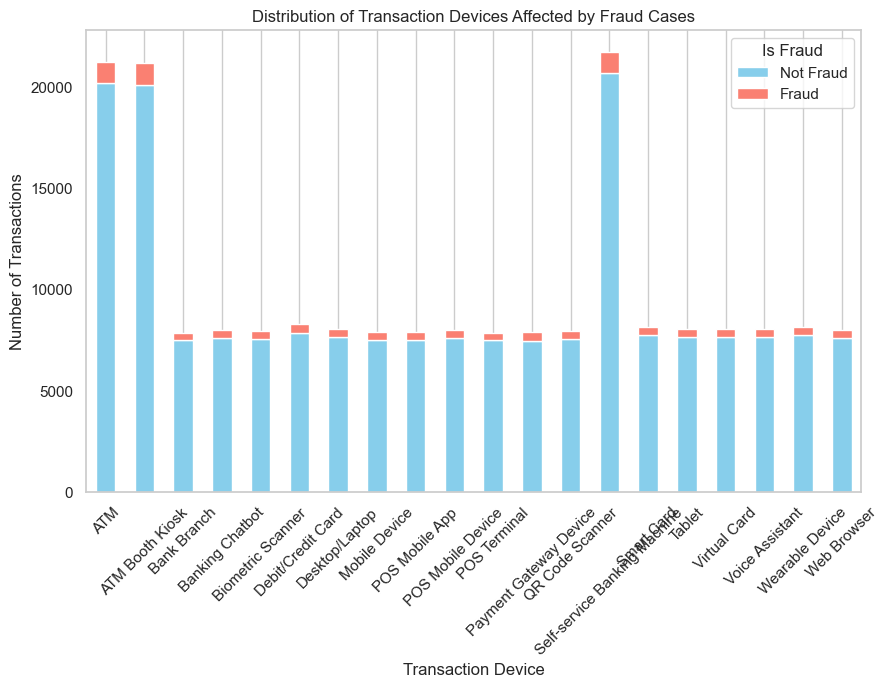

In [24]:
# Here group the transaction devices and fraud status
grouped_data = df1.groupby(['Transaction_Device', 'Is_Fraud']).size().unstack(fill_value = 0)
print("/nHere is the grouped data by Transaction Device and Fraud Status:")
print(grouped_data)

# Plot the data
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Distribution of Transaction Devices Affected by Fraud Cases')
plt.xlabel('Transaction Device')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend(title='Is Fraud', labels=['Not Fraud', 'Fraud'])
plt.grid(axis='y')

# Show the plot
plt.show()


Account_Type  Is_Fraud  Transaction_Amount
Business      0         49676.893774          1
              1         49145.601315          1
Checking      0         49638.506099          1
              1         49797.408423          1
Savings       0         49339.967154          1
              1         48901.338818          1
Name: count, dtype: int64


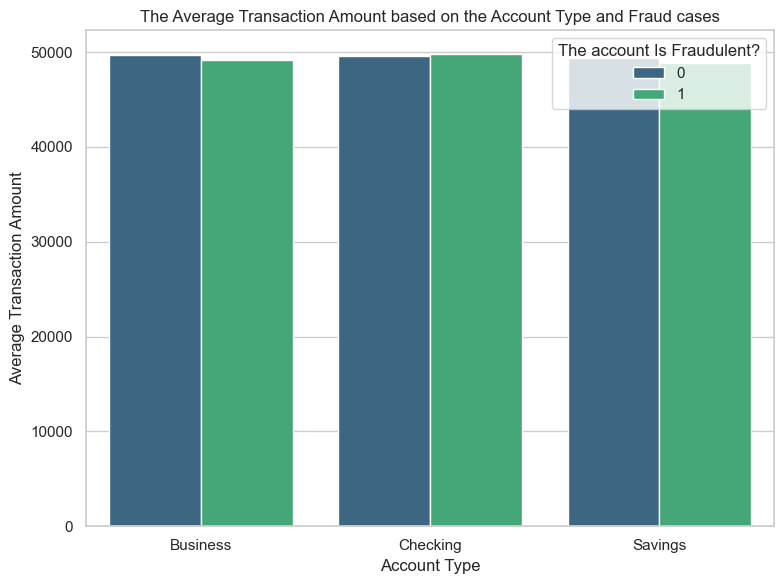

In [25]:
# classify the transactions amounts and the account type as Fraudulent 
grouped_data = df1.groupby(['Account_Type', 'Is_Fraud'])['Transaction_Amount'].mean().reset_index()
print(grouped_data.value_counts())

# visualize the grouped data
plt.figure(figsize = (8, 6))
sns.barplot(x = 'Account_Type', y = 'Transaction_Amount', hue = 'Is_Fraud', data = grouped_data, palette = 'viridis')
plt.title("The Average Transaction Amount based on the Account Type and Fraud cases")
plt.xlabel('Account Type')
plt.ylabel('Average Transaction Amount')
plt.legend(title = 'The account Is Fraudulent?')
plt.tight_layout()
plt.show()

In [26]:
# Get the most common Transaction method used by customers 
most_common_payment_method = df1['Transaction_Type'].mode()[0]
print("Most Common Payment Method:", most_common_payment_method)

Most Common Payment Method: Credit


In [37]:
df1.head()

,Gender,Age,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Device_Type,Is_Fraud,Transaction_Description,age_group,transaction_datetime
0,Male,60,Savings,23-01-2025,16:04:07,32415.45,Transfer,Restaurant,74557.27,Voice Assistant,POS,0,Bitcoin transaction,61-70,2025-01-23 16:04:07
1,Female,51,Business,11-01-2025,17:14:53,43622.60,Bill Payment,Restaurant,74622.66,POS Mobile Device,Desktop,0,Grocery delivery,51-60,2025-01-11 17:14:53
2,Male,20,Savings,25-01-2025,03:09:52,63062.56,Bill Payment,Groceries,66817.99,ATM,Desktop,0,Mutual fund investment,19-30,2025-01-25 03:09:52
3,Female,57,Business,19-01-2025,12:27:02,14000.72,Debit,Entertainment,58177.08,POS Mobile App,Mobile,0,Food delivery,51-60,2025-01-19 12:27:02
4,Female,43,Savings,30-01-2025,18:30:46,18335.16,Transfer,Entertainment,16108.56,Virtual Card,Mobile,0,Debt repayment,41-50,2025-01-30 18:30:46


# Identifies the peak fraud period based on the transaction date and transaction time.


Peak Fraud Period:
Start: 2025-01-08 18:00:00
End: 2025-01-08 19:00:00


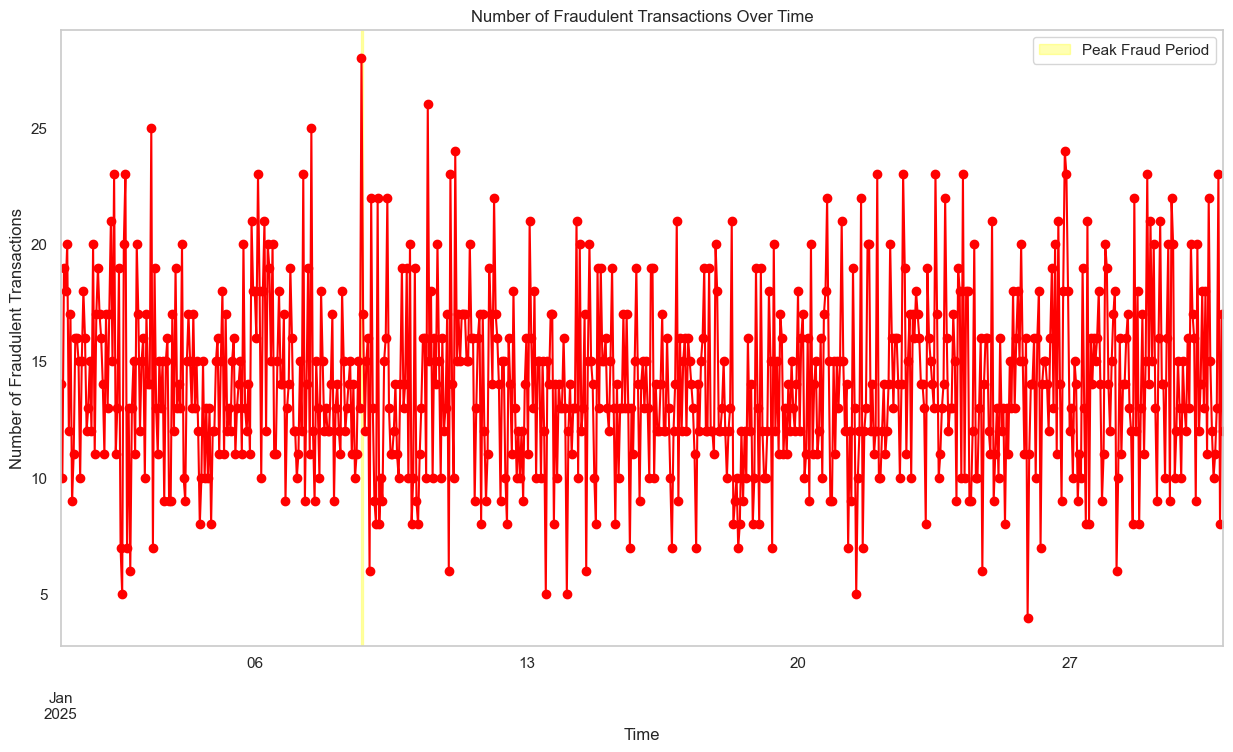

In [28]:
# Combine Transaction_Date and Transaction_Time into a single datetime column
df1['transaction_datetime'] = pd.to_datetime(df1['Transaction_Date'] + ' ' + df1['Transaction_Time'])

# Filter the dataset to include only fraudulent transactions
fraud_df = df1[df1['Is_Fraud'] == 1]

# Resample the data to count the number of frauds per hour
fraud_df.set_index('transaction_datetime', inplace=True)
fraud_counts = fraud_df.resample('H').size()

# Identify the peak fraud period
peak_period_start = fraud_counts.idxmax()
peak_period_end = peak_period_start + pd.Timedelta(hours=1)

print("\nPeak Fraud Period:")
print(f"Start: {peak_period_start}")
print(f"End: {peak_period_end}")

# Step 5: Visualize the fraud counts over time
plt.figure(figsize=(15, 8))
fraud_counts.plot(kind='line', marker='o', color='red')
plt.axvspan(peak_period_start, peak_period_end, color='yellow', alpha=0.3, label='Peak Fraud Period')
plt.title("Number of Fraudulent Transactions Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Fraudulent Transactions")
plt.legend()
plt.grid()
plt.show()

The Peak Fraud period was reported on 8th of January from 1800 hrs to 1900 hrs. This clearly indicates that fraud cases were reported at evening hours especially after work hours.

In [ ]:
df1['Transaction_Amount'].value_counts()git

Transaction_Amount
78931.12    3
48165.03    3
3591.91     3
56984.73    3
60214.31    3
           ..
97561.90    1
16607.76    1
42482.95    1
37063.23    1
58622.49    1
Name: count, Length: 197978, dtype: int64

In [30]:
df1['Transaction_Amount'].max()

98999.98

In [31]:
df1['Transaction_Amount'].min()

10.29

Ensemble Methods
Balanced Random Forest: Modifies the random forest algorithm to handle class imbalance by undersampling the majority class at each tree.
AdaBoost: Adjusts the weights of incorrectly classified instances, which can help in focusing on the minority class.

## Step1: Create the Logistic Regression model as the baseline model

Select the features and target columns then perform split on the train and test

In [33]:
X = df1.drop(columns = ["Is_Fraud"], axis = 1)
y = df1["Is_Fraud"]

# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

# check the shapes for both X_train and X_test 
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

# Identifying numerical and categorical columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# creating preprocessing transformers for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown = "ignore")

# combine the transformers into the column transformers
preprocessor =  ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# create a pipeline that includes
pipeline = Pipeline(steps = [
    ('Preprocessor', preprocessor), 
    ('classifier', LogisticRegression())
])

# fitting the pipeline on the training data
pipeline.fit(X_train, y_train)

# get the prediction on the test data
y_pred = pipeline.predict(X_test)

# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Shape of X_train: (160000, 14)
Shape of X_test: (40000, 14)
Accuracy: 0.948875

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37955
           1       0.00      0.00      0.00      2045

    accuracy                           0.95     40000
   macro avg       0.47      0.50      0.49     40000
weighted avg       0.90      0.95      0.92     40000



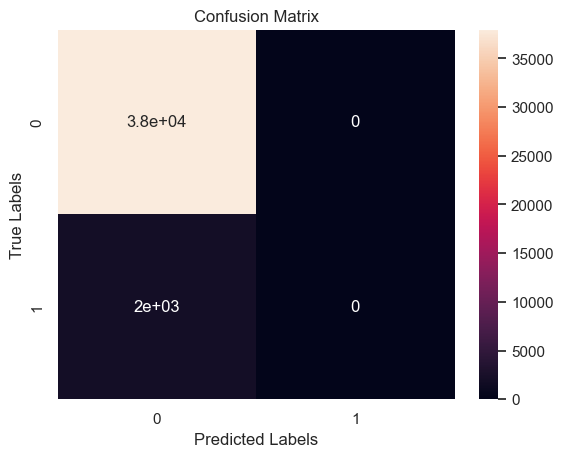

[[37955     0]
 [ 2045     0]]


In [34]:
# computing for the confusion matrix
cfn = confusion_matrix(y_test, y_pred)
sns.heatmap(cfn, annot = True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(cfn)

* True Negatives (TN) = 37955: The model correctly predicted 2401 instances as the negative class.

* False Positives (FP) = 0: The model incorrectly predicted 414 instances as the positive class when they were actually negative.

* False Negatives (FN) = 2045: The model incorrectly predicted 617 instances as the negative class when they were actually positive.

* True Positives (TP) = 0: The model correctly predicted 1117 instances as the positive class.

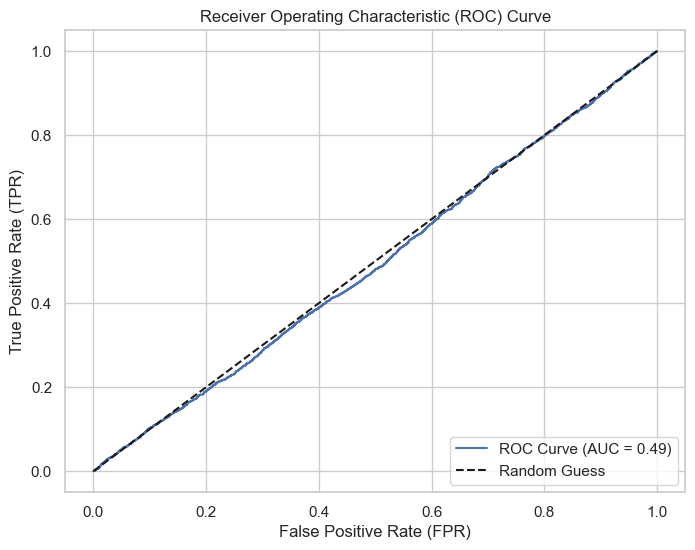

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# # Fit the pipeline on the training data
# pipeline.fit(X_train, y_train)

# Get the predicted probabilities for the positive class (class 1)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Recommendations
* Risk Assessment:

Understanding the distribution of fraud cases by age group can aid in risk assessment and the development of targeted fraud prevention strategies.
Financial institutions and security agencies can use this information to implement age-specific awareness campaigns and security measures.

* Targeted Fraud Prevention:

Understanding the distribution of fraud cases by gender can help in designing targeted fraud prevention strategies.
For example, if females have a higher number of fraud cases, awareness campaigns and security measures can be tailored specifically for female users.